Q.2. Prepare a prediction model for profit of 50_startups data.

#  import required libraries

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api as smf
from statsmodels.graphics.regressionplots import influence_plot

# import dataset

In [2]:
startup_data = pd.read_csv('50_Startups.csv')
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Initial analysis

In [3]:
startup_data.shape

(50, 5)

In [4]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [10]:
startup_data1 = startup_data.rename({'R&D Spend':'RDS','Administration':'ADS','Marketing Spend':'MS'},axis = 1)

In [11]:
startup_data1.head()

,RDS,ADS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
startup_new = startup_data1.drop(labels= 'State',axis = 1)

In [13]:
startup_new.head()

,RDS,ADS,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


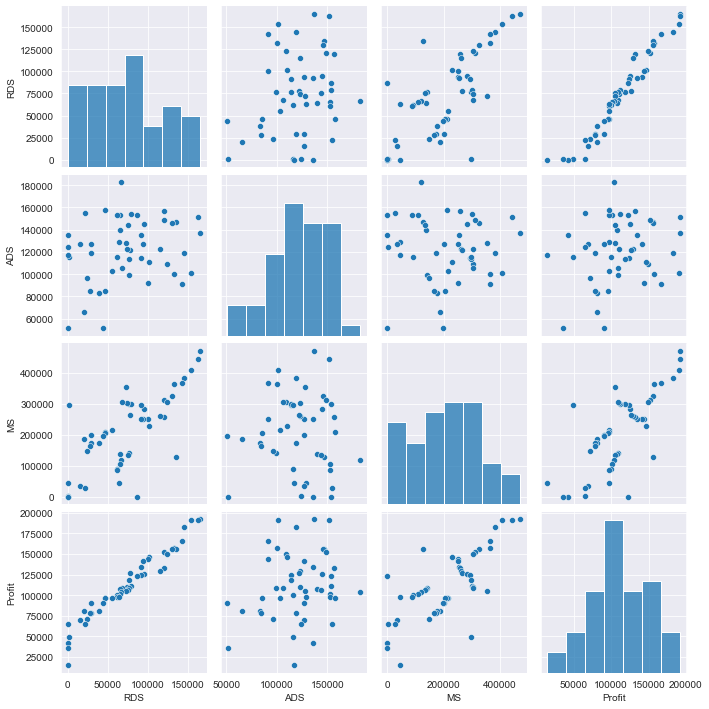

In [15]:
sns.set_style('darkgrid')
sns.pairplot(startup_new)

## preparing model

In [86]:
model = sm.ols('Profit~RDS+ADS+MS',data = startup_new).fit()

In [22]:
model.params

Intercept    50122.192990
RDS              0.805715
ADS             -0.026816
MS               0.027228
dtype: float64

In [25]:
model.tvalues,np.round(model.pvalues,4)

(Intercept     7.626218
 RDS          17.846374
 ADS          -0.525507
 MS            1.655077
 dtype: float64,
 Intercept    0.0000
 RDS          0.0000
 ADS          0.6018
 MS           0.1047
 dtype: float64)

In [27]:
# calculate r square value
print('R square     :',model.rsquared)
print('adj R square :',model.rsquared_adj)

R square     : 0.9507459940683246
adj R square : 0.9475337762901719


## build SLM and MLM for insignificant variable

In [28]:
model_1 = sm.ols('Profit~ADS',data = startup_new).fit()

In [30]:
model_1.pvalues,model_1.tvalues  # pvalues is greater of ADS so it is in-significant

(Intercept    0.003824
 ADS          0.162217
 dtype: float64,
 Intercept    3.040044
 ADS          1.419493
 dtype: float64)

In [32]:
model_2 = sm.ols('Profit~MS',data = startup_new).fit()
model_2.pvalues,model_2.tvalues  # MS is significant pvalues

(Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64,
 Intercept    7.808356
 MS           7.802657
 dtype: float64)

In [34]:
model_3 = sm.ols('Profit~ADS+MS',data = startup_new).fit()
model_3.pvalues,model_3.tvalues   # both variable as significant pvalues

(Intercept    2.589341e-01
 ADS          1.729198e-02
 MS           9.727245e-11
 dtype: float64,
 Intercept    1.142741
 ADS          2.467779
 MS           8.281039
 dtype: float64)

## Model validation techniques
* collinearity check
* residual analysis

### collinearity check

In [36]:
rsqu_rds = sm.ols('RDS~ADS+MS',data = startup_new).fit().rsquared
vif_rds = 1/(1-rsqu_rds)

rsqu_ads = sm.ols('ADS~RDS+MS',data = startup_new).fit().rsquared
vif_ads = 1/(1-rsqu_ads)

rsqu_ms = sm.ols('MS~RDS+ADS',data = startup_new).fit().rsquared
vif_ms = 1/(1-rsqu_ms)

data = pd.DataFrame({'variable':['RDS','ADS','MS'],
                     'vif':[vif_rds,vif_ads,vif_ms]})
data

,variable,vif
0,RDS,2.468903
1,ADS,1.175091
2,MS,2.326773


In [37]:
# vif value os all variable is <10 so it indicate no multi collinearity between them

### Residual analysis

Text(0.5, 1.0, 'qq plot of residual')

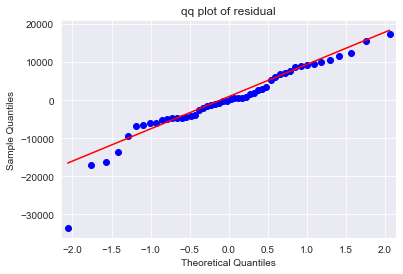

In [41]:
qqplot = smf.qqplot(model.resid,line='q')
plt.title('qq plot of residual')

In [43]:
list(np.where(model.resid<-30000))  # outlier on qq plot

[array([49], dtype=int64)]

## residual plot homoscadeacity

In [45]:
def standard_value(vals):
    return (vals - vals.mean())/vals.std()

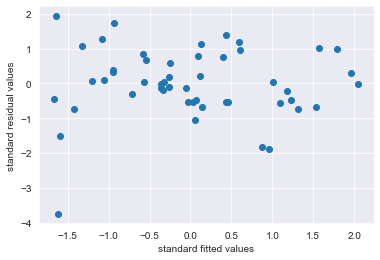

In [47]:
plt.scatter(standard_value(model.fittedvalues),standard_value(model.resid))
plt.xlabel('standard fitted values')
plt.ylabel('standard residual values')
plt.show()

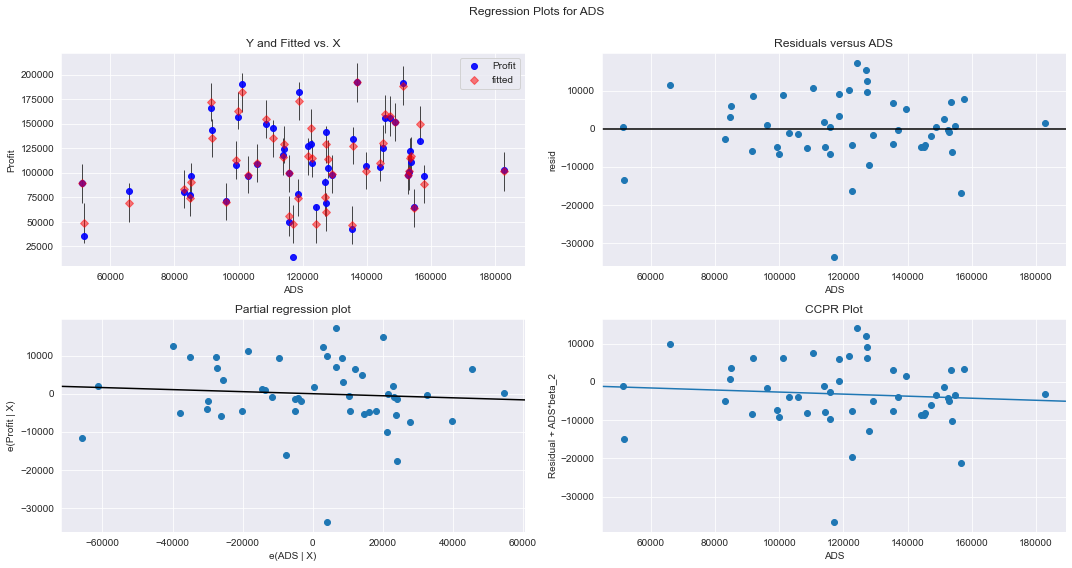

In [48]:
fig = plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(model,'ADS',fig = fig)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

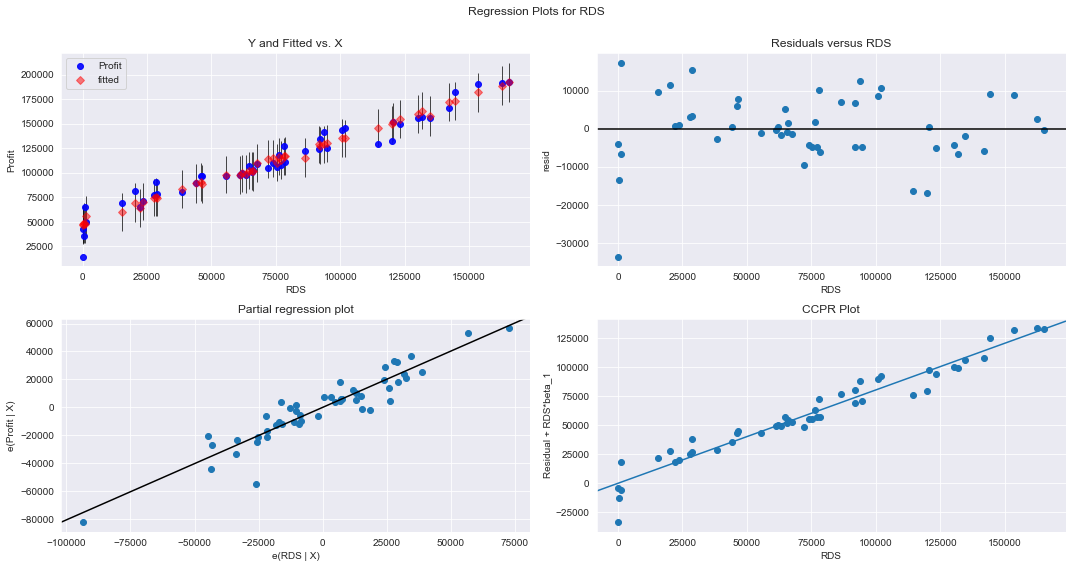

In [49]:
fig = plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(model,'RDS',fig = fig)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

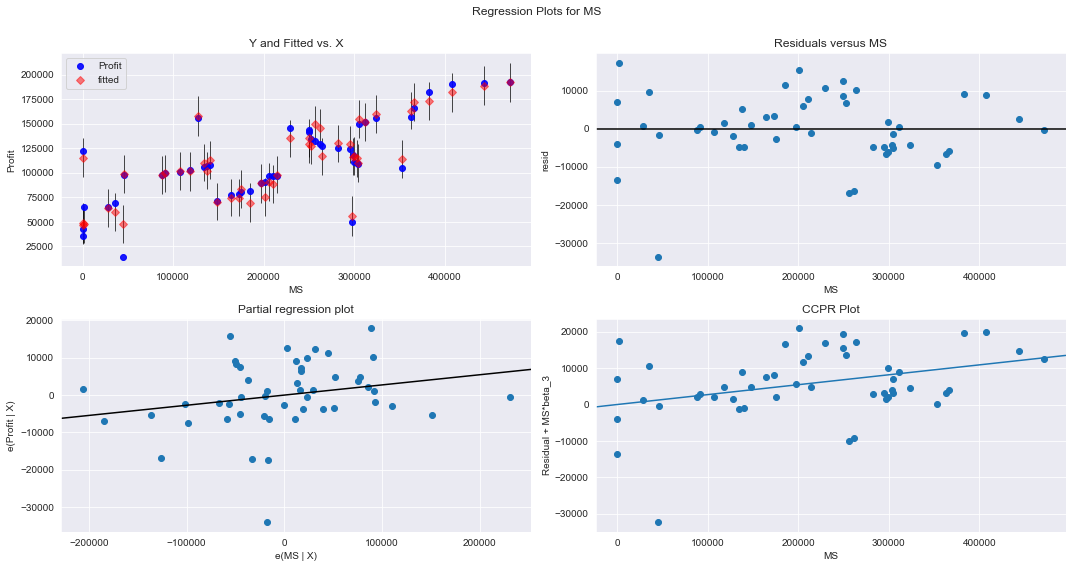

In [50]:
fig = plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(model,'MS',fig = fig)
plt.show

## check outliers
* cook's distance
* leverage distance

### cooks distance

In [52]:
model_influencer = model.get_influence()
(c,_) = model_influencer.cooks_distance

In [53]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<function matplotlib.pyplot.show(close=None, block=None)>

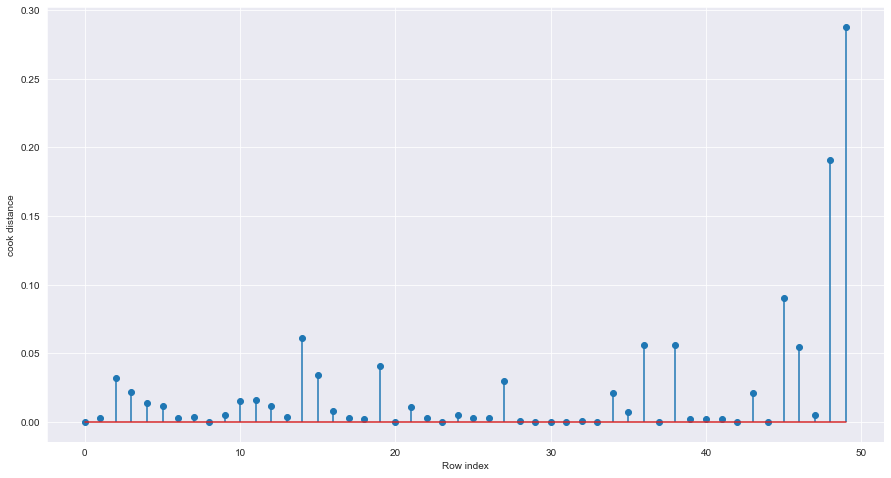

In [59]:
plt.figure(figsize = (15,8))
plt.stem(np.arange(len(startup_new)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cook distance')
plt.show

In [60]:
np.argmax(c),np.max(c)

(49, 0.28808229275432673)

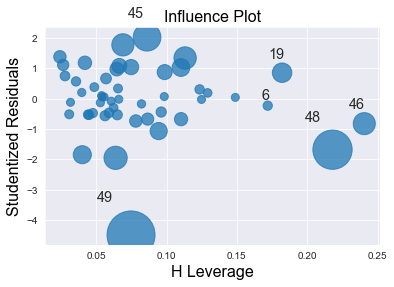

In [64]:
influence_plot(model)   # points beyond leverange cut off value are outliers
plt.show()

In [61]:
# leverange cut off range
k = startup_new.shape[1]
n = startup_new.shape[0]
levrange_val = (3*(k+1))/n
levrange_val

0.3

In [62]:
# from the above data the value beyond 0.3 is outliers

In [65]:
startup_new[startup_new.index.isin([49])]

,RDS,ADS,MS,Profit
49,0.0,116983.8,45173.06,14681.4


## create new model

In [66]:
new_start = startup_new.copy()
new_start

,RDS,ADS,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [68]:
start_2 = new_start.drop(new_start.index[[49]],axis = 0).reset_index(drop = True)
start_2

,RDS,ADS,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


## build new model

In [91]:
while np.max(c)>0.5:
    model_4 = sm.ols('Profit~RDS+ADS+MS',data = start_2).fit()
    (c,_) = model_4.get_influence.cooks_distance
    c
    np.argmax(c),np.max(c)
    start_2 = start_2.drop(start_2.index(np.argmax(c),axis = 0)).reset_index(drop = True)
    start_2
else:
    final_model = sm.ols('Profit~RDS+ADS+MS',data = start_2).fit()
    final_model.rsquared,model.aic
    print('The final model accurency is improve to',final_model.rsquared)

The final model accurency is improve to 0.9613162435129847


In [92]:
final_model.rsquared

0.9613162435129847

## model prediction

In [93]:
test_data = pd.DataFrame({'RDS':14000,'ADS':17000,'MS':20000},index = [0])

In [94]:
test_data

,RDS,ADS,MS
0,14000,17000,20000


In [95]:
final_model.predict(test_data)

0    63471.714719
dtype: float64

In [96]:
y_pred = final_model.predict(new_start)

In [97]:
y_pred

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
49     50925.119153


## R^2 table

In [101]:
r_value = pd.DataFrame({'model':['first model','final model'],'Rvalues':[model.rsquared,final_model.rsquared]})

In [99]:
r_value

,model,Rvalues
0,first model,0.950746
1,final model,0.961316
